# Kata Kunci Berita


Mencari dokumen melalui kata kunci dapat mempermudah kita dalam mencari suatu dokumen yang relevan. Kata Kunci merupakan kata yang penting dan sering muncul dalam sebuah teks maupun dokumen. Biasanya kata kunci mengandung kata yang unik, dan bermakna spesifik.


## Proses Pembersihan Teks


### Import Library


In [158]:
# Library untuk text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Library untuk data manipulation
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

# Library untuk text similarity
from sklearn.metrics.pairwise import cosine_similarity 

### Load Data


In [159]:
data = pd.read_csv('../tugas1/data_100.csv')
data

,judul,tanggal,isi,kategori
0,FOTO: Melihat Kehancuran Gaza usai Satu Tahun ...,"Senin, 07 Okt 2024 10:30 WIB",Satu tahun agresi Israel ke Gaza yang dimulai ...,internasional
1,"VIDEO: Setahun Agresi Israel ke Gaza, Korban T...","Senin, 07 Okt 2024 10:03 WIB",Agresi Israel ke Jalur Gaza telah memasuki sat...,internasional
2,Jenderal Brigade Al-Quds Iran Hilang usai Isra...,"Senin, 07 Okt 2024 09:59 WIB","Kepala pasukan Brigade Al-Quds Iran, Esmail Qa...",internasional
3,VIDEO: Kelompok Militan Pakistan Serang Karach...,"Senin, 07 Okt 2024 09:28 WIB",Sebuah ledakan terjadi di dekat bandara intern...,internasional
4,"Setahun Agresi Gaza, Israel Was-was Antisipasi...","Senin, 07 Okt 2024 09:25 WIB",Pasukan Pertahanan Israel (IDF) bersiaga ketat...,internasional
...,...,...,...,...
95,VIDEO: Momen Perang Yel-yel Warnai Debat Perda...,"Minggu, 06 Okt 2024 20:42 WIB",Perang yel-yel dari tiga pendukung calon guber...,nasional
96,Dharma Sindir Gagasan RK-Pramono soal Kemaceta...,"Minggu, 06 Okt 2024 20:34 WIB","Calon gubernur jalur independen, Dharma Pongre...",nasional
97,Pramono Janji Buat Jaringan Transjakarta hingg...,"Minggu, 06 Okt 2024 20:31 WIB",Calon gubernur Jakarta Pramono Anung berjanji ...,nasional
98,Jurus RK Atasi Macet: Bikin Angkutan Sungai Hi...,"Minggu, 06 Okt 2024 20:29 WIB",Calon Gubernur Jakarta Ridwan Kamil mengungkap...,nasional


### Preprocessing Text


In [160]:
def clean_text(text):
	text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Menghapus https* and www*
	text = re.sub(r'@[^\s]+', ' ', text) # Menghapus username
	text = re.sub(r'[\s]+', ' ', text) # Menghapus tambahan spasi
	text = re.sub(r'#([^\s]+)', ' ', text) # Menghapus hashtags
	text = re.sub(r'rt', ' ', text) # Menghapus retweet
	text = re.sub(r"[^a-zA-Z :\.]", "", text) # Menghapus tanda baca
	text = re.sub(r'\d', ' ', text) # Menghapus angka
	text = text.lower()
	text = text.encode('ascii','ignore').decode('utf-8') #Menghapus ASCII dan unicode
	text = re.sub(r'[^\x00-\x7f]',r'', text)
	text = text.replace('\n','') #Menghapus baris baru
	text = text.strip()
	return text

def clean_stopword(tokens):
	listStopword =  set(stopwords.words('indonesian'))
	filtered_words = [word for word in tokens if word.lower() not in listStopword]
	return filtered_words

Membersihkan text dari tanda baca yang ada, kemudian menyesuaikan text agar bisa diolah lebih lanjut.


In [161]:
def preprocess_text(content):
	result = {}
	for i, text in enumerate(tqdm(content)):
		cleaned_text = clean_text(text)
		tokens = word_tokenize(cleaned_text)
		cleaned_stopword = clean_stopword(tokens)
		result[i] = ' '.join(cleaned_stopword)
	return result

data['cleaned_news'] = preprocess_text(data['isi'])
data

100%|██████████| 100/100 [00:00<00:00, 330.80it/s]


,judul,tanggal,isi,kategori,cleaned_news
0,FOTO: Melihat Kehancuran Gaza usai Satu Tahun ...,"Senin, 07 Okt 2024 10:30 WIB",Satu tahun agresi Israel ke Gaza yang dimulai ...,internasional,agresi israel gaza oktober warga palestina ter...
1,"VIDEO: Setahun Agresi Israel ke Gaza, Korban T...","Senin, 07 Okt 2024 10:03 WIB",Agresi Israel ke Jalur Gaza telah memasuki sat...,internasional,agresi israel jalur gaza memasuki senin . rent...
2,Jenderal Brigade Al-Quds Iran Hilang usai Isra...,"Senin, 07 Okt 2024 09:59 WIB","Kepala pasukan Brigade Al-Quds Iran, Esmail Qa...",internasional,kepala pasukan brigade alquds iran esmail qaan...
3,VIDEO: Kelompok Militan Pakistan Serang Karach...,"Senin, 07 Okt 2024 09:28 WIB",Sebuah ledakan terjadi di dekat bandara intern...,internasional,ledakan bandara internasional karachi pakistan...
4,"Setahun Agresi Gaza, Israel Was-was Antisipasi...","Senin, 07 Okt 2024 09:25 WIB",Pasukan Pertahanan Israel (IDF) bersiaga ketat...,internasional,pasukan pe ahanan israel idf bersiaga ketat pe...
...,...,...,...,...,...
95,VIDEO: Momen Perang Yel-yel Warnai Debat Perda...,"Minggu, 06 Okt 2024 20:42 WIB",Perang yel-yel dari tiga pendukung calon guber...,nasional,perang yelyel pendukung calon gubernur dki jak...
96,Dharma Sindir Gagasan RK-Pramono soal Kemaceta...,"Minggu, 06 Okt 2024 20:34 WIB","Calon gubernur jalur independen, Dharma Pongre...",nasional,calon gubernur jalur independen dharma pongrek...
97,Pramono Janji Buat Jaringan Transjakarta hingg...,"Minggu, 06 Okt 2024 20:31 WIB",Calon gubernur Jakarta Pramono Anung berjanji ...,nasional,calon gubernur jaka a pramono anung berjanji j...
98,Jurus RK Atasi Macet: Bikin Angkutan Sungai Hi...,"Minggu, 06 Okt 2024 20:29 WIB",Calon Gubernur Jakarta Ridwan Kamil mengungkap...,nasional,calon gubernur jaka a ridwan kamil mengungkap ...


### Memisahkan Kalimat menjadi per Kata


In [193]:
kalimat = nltk.sent_tokenize(data['cleaned_news'][4])
kalimat = [sentence.replace('.', '') for sentence in kalimat]
kata = nltk.word_tokenize(data['cleaned_news'][4])
kata = list(set(k for k in kata if k != '.'))

In [212]:
kalimat

['pasukan pe ahanan israel idf bersiaga ketat perbatasan menjelang agresi jalur gaza palestina minggu ',
 'idf bersiaga mengantisipasi serangan kelompok milisi hamas palestina senin peringatan konflik oktober ',
 'the times of israel melaporkan idf memperkuat pasukan perbatasan mengantisipasi serangan roket jarak ditembakkan gaza ',
 'sumber militer percaya hamas serangan roket operasinya ditumpas israel ',
 'komando selatan pe ahanan serangan skenario bulanbulan bersamaan acara peringatan dilaksanakan aman pernyataan idf ',
 'militer hamas menembakkan roket gaza perbatasan israel ',
 'militer memperkuat pe ahanan perbatasan gaza koridor netzarim lokasi pendudukan idf ',
 'kompi dilaporkan dikerahkan menjaga kotakota perbatasan zionis ',
 'kewaspadaan ',
 'tingkat kesiapan tindakan ofensif kepala komando selatan yaron finkelman ',
 'sabtu malam juru bicara idf daniel hagari mewantiwanti warga sipil berhatihati ',
 'meningkatkan pasukan mengantisipasi ',
 'agresi israel gaza senin memas

In [213]:
kata

['pasukan',
 'meninggal',
 'warga',
 'peringatan',
 'gaza',
 'juru',
 'roket',
 'sipil',
 'mengantisipasi',
 'upacara',
 'oktober',
 'bicara',
 'melaporkan',
 'dilaporkan',
 'orang',
 'keluarga',
 'mewantiwanti',
 'melukai',
 'pemerintah',
 'ditembakkan',
 'bersiaga',
 'acara',
 'komando',
 'penyanderaan',
 'netzarim',
 'pe',
 'menembakkan',
 'zionis',
 'dikabarkan',
 'kelompok',
 'sumber',
 'of',
 'tel',
 'menggelar',
 'yaron',
 'hagari',
 'kewaspadaan',
 'tingkat',
 'yarkon',
 'catatan',
 'finkelman',
 'tindakan',
 'dikerahkan',
 'senjata',
 'aviv',
 'menyepakati',
 'serangan',
 'palestina',
 'tewas',
 'menjelang',
 'aman',
 'agresi',
 'disandera',
 'koridor',
 'jalur',
 'ditawan',
 'taman',
 'kotakota',
 'hamas',
 'operasinya',
 'idf',
 'bulanbulan',
 'menjaga',
 'kompi',
 'terbatas',
 'times',
 'kunjung',
 'senin',
 'ofensif',
 'malam',
 'sabtu',
 'israel',
 'kesiapan',
 'berkumpul',
 'kepala',
 'daniel',
 'lokasi',
 'skenario',
 'minggu',
 'ahanan',
 'konflik',
 'gencatan',
 'meni

## Membuat Matriks


### Menghitung kemunculan kata


frekuensi kemunculan dua kata atau istilah yang berdekatan secara berurutan dalam kumpulan teks. Dalam linguistik, kemunculan kata/co-occurrence dapat menjadi indikator kedekatan semantik.


In [214]:
def vektor_kata(data):
	vektor_kata = pd.DataFrame(0, index=kata, columns=kata)
	
	for sent in data:
		kata_kalimat = word_tokenize(sent)
		
		# menghitung tetangga setiap kata
		for i in range(len(kata_kalimat) - 1):
			vektor_kata.at[kata_kalimat[i], kata_kalimat[i+1]] += 1
			vektor_kata.at[kata_kalimat[i+1], kata_kalimat[i]] += 1
	return vektor_kata

In [215]:
test = vektor_kata(kalimat)
test

,pasukan,meninggal,warga,peringatan,gaza,juru,roket,sipil,mengantisipasi,upacara,...,bersamaan,ketat,jarak,the,berhatihati,sandera,pasca,dilaksanakan,memperkuat,militer
pasukan,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
meninggal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
warga,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
peringatan,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
gaza,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sandera,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pasca,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dilaksanakan,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
memperkuat,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Cosine Similarity


Cosine similarity digunakan untuk mengukur seberapa mirip dua vektor dalam ruang berdimensi banyak. Hasil dari cosine similarity ini akan menentukan apakah vektor tersebut menuju ke arah yang sama. Semakin kecil sudut antara dua vektor, maka semakin mirip satu sama lain sedangkan begitu juga sebaliknya, semakin besar nilai cosine similarity maka vektor tersebut dianggap jauh kemiripannya. Dalam ringkasan dokumen ini penting untuk menghitung nilai cosine similarity untuk mengetahui hubungan kesamaan antara kalimat satu dengan kalimat lainnya. Vektor yang digunakan untuk menghitung nilai cosine simmilarity ini adalah hasil dari TF-IDF pada langkah sebelumnya.


$$simmilarity(A, B) = \frac{A \cdot B}{|A||B|}$$


Keterangan:

$A.B$ = Vector dot product dari A dan B dihitung dengan $\sum_{i=1}^n x_{k}y_{k}$

$|A|$ = Panjang vektor A dihitung dengan $\sum_{i=1}^n x_{k}^2$ = $\sqrt{\mathrm{a}_{1}^{2} + \mathrm{a}_{2}^{2} + \mathrm{a}_{3}^{2}} +...+ \mathrm{n}_{n}^{2}$

$|B|$ = Panjang vektor B dihitung dengan $\sum_{i=1}^n y_{k}^2$ = $\sqrt{\mathrm{b}_{1}^{2} + \mathrm{b}_{2}^{2} + \mathrm{b}_{3}^{2}} + ...+ \mathrm{n}_{n}^{2}$


In [211]:
cossim = cosine_similarity(test, test)

similarity_matrix = pd.DataFrame(cossim, 
								 index=kata, 
								 columns=kata)

similarity_matrix

,pasukan,meninggal,warga,peringatan,gaza,juru,roket,sipil,mengantisipasi,upacara,...,bersamaan,ketat,jarak,the,berhatihati,sandera,pasca,dilaksanakan,memperkuat,militer
pasukan,1.000000,0.0,0.000000,0.00000,0.230940,0.0,0.0,0.0,0.169031,0.000000,...,0.000000,0.316228,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.223607,0.223607
meninggal,0.000000,1.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
warga,0.000000,0.0,1.000000,0.00000,0.149071,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.57735,0.000000,0.000000,0.0,0.000000,0.000000
peringatan,0.000000,0.0,0.000000,1.00000,0.097590,0.0,0.0,0.0,0.000000,0.000000,...,0.267261,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000
gaza,0.230940,0.0,0.149071,0.09759,1.000000,0.0,0.0,0.0,0.195180,0.000000,...,0.000000,0.365148,0.365148,0.0,0.00000,0.000000,0.182574,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sandera,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.000000,0.0,0.000000,0.353553
pasca,0.000000,0.0,0.000000,0.00000,0.182574,0.0,0.5,0.0,0.534522,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,1.000000,0.0,0.000000,0.000000
dilaksanakan,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.408248,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,1.0,0.000000,0.000000
memperkuat,0.223607,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.188982,0.000000,...,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,1.000000,0.000000


## Graph


Hasil dari nilai _Cosine Simmilarity_ ini akan dapat digunakan untuk membentuk graph dengan menggunakan modul nx.graph. Graph ini akan menggambarkan ilustrasi dari kedekatan setiap kalimatnya dalam berita tersebut. Dalam proses penggambaran graph tersebut diperlukan ambang batas _(threshold)_ yang digunakan untuk memberikan batasan agar keseluruhan kalimatnya tidak dihubungkan menggunakan garis _(edge)_. Nilai ambang batas _(threshold)_ yang digunakan adalah **0.1**


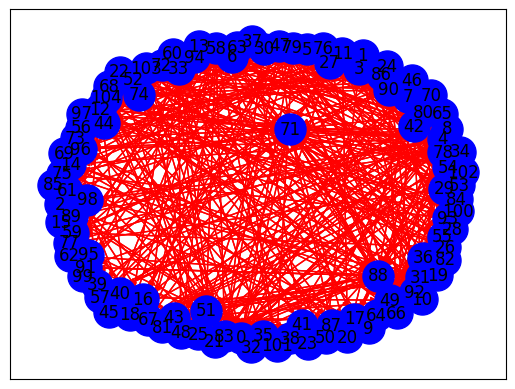

In [209]:
G = nx.DiGraph()
for i in range(len(cossim)):
	G.add_node(i)

for i in range(len(cossim)):
	for j in range(len(cossim)):
		similarity = cossim[i][j]
		if similarity > 0.1 and i != j:
			G.add_edge(i, j)

pos = nx.spring_layout(G, k=4)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='red', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

## Matrix Centralitas


Matriks Sentralitas adalah matriks yang digunakan untuk merepresentasikan ukuran sentralitas dari setiap node dalam jaringan. Sentralitas adalah konsep dalam analisis jaringan yang mencoba mengukur sejauh mana suatu node berada di pusat jaringan atau sejauh mana suatu node penting dalam graph.


### PageRank


Dalam konteks ini, dokumen dianggap sebagai “halaman” yang terhubung oleh hubungan yang merefleksikan keterkaitan atau relevansinya. Dengan menerapkan konsep PageRank, dokumen yang dianggap lebih “penting” atau relevan dapat diberikan skor lebih tinggi. Penggunaan faktor damping, serupa dengan dalam algoritma PageRank, dapat membantu mengontrol sejauh mana pengaruh satu dokumen terhadap yang lain. Dengan memberikan skor pada dokumen berdasarkan hubungan mereka dalam jaringan informasi, kita dapat menghasilkan ringkasan yang mencerminkan tingkat relevansi dan pentingnya masing-masing dokumen dalam konteks keseluruhan.


$$PR_i = \frac{1-d}{n} + d \sum_{P_j\in\{1 \dots,n\}} \frac{PR_i}{L_j}$$


Keterangan:

$PR(i)$ = adalah PageRank dari halaman web ke i.<br>
$d$ = adalah faktor redaman, biasanya diatur sebesar 0,85, yang digunakan untuk menghitung probabilitas bahwa peramban acak akan “melompat” ke halaman acak dan tidak mengikuti sebuah link.<br>
$PR(i)$ = adalah PageRank halaman ke i, yaitu halaman yang memiliki sambungan yang mengarah ke halaman i.<br>
$L(c)$ = adalah jumlah hubungan keluar pada halaman j.


In [199]:
pagerank = nx.pagerank(G)

sorted_pagerank= sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, pagerank in sorted_pagerank:
	print(f"Node {node}: {pagerank:.4f}")

Page Rank :
Node 71: 0.0390
Node 4: 0.0319
Node 58: 0.0301
Node 88: 0.0246
Node 47: 0.0242
Node 67: 0.0240
Node 79: 0.0212
Node 46: 0.0203
Node 8: 0.0190
Node 60: 0.0189
Node 103: 0.0189
Node 54: 0.0187
Node 12: 0.0179
Node 0: 0.0173
Node 104: 0.0151
Node 6: 0.0146
Node 83: 0.0142
Node 14: 0.0141
Node 26: 0.0141
Node 52: 0.0136
Node 3: 0.0135
Node 25: 0.0131
Node 66: 0.0130
Node 31: 0.0130
Node 55: 0.0126
Node 10: 0.0120
Node 91: 0.0119
Node 57: 0.0112
Node 80: 0.0111
Node 90: 0.0111
Node 100: 0.0111
Node 20: 0.0110
Node 9: 0.0110
Node 18: 0.0110
Node 51: 0.0110
Node 49: 0.0109
Node 2: 0.0105
Node 11: 0.0103
Node 101: 0.0103
Node 53: 0.0102
Node 96: 0.0100
Node 86: 0.0097
Node 92: 0.0097
Node 75: 0.0096
Node 33: 0.0095
Node 21: 0.0095
Node 93: 0.0094
Node 102: 0.0091
Node 27: 0.0089
Node 19: 0.0087
Node 77: 0.0087
Node 41: 0.0087
Node 23: 0.0080
Node 22: 0.0078
Node 44: 0.0077
Node 68: 0.0076
Node 73: 0.0075
Node 29: 0.0071
Node 74: 0.0068
Node 84: 0.0067
Node 17: 0.0067
Node 78: 0.006

### Hasil Kata Kunci


In [200]:
print("Tiga Node Tertinggi Page Rank :")
sentence = ""
for node, pagerank in sorted_pagerank[:3]:
  top_sentence = kata[node]
  sentence += top_sentence + ", "
  print(f"Node {node}: Page Rank = {pagerank:.4f}")
  print(f"Kalimat: {top_sentence}")

Tiga Node Tertinggi Page Rank :
Node 71: Page Rank = 0.0390
Kalimat: israel
Node 4: Page Rank = 0.0319
Kalimat: gaza
Node 58: Page Rank = 0.0301
Kalimat: hamas


In [201]:
print('Kata Kunci :', sentence)

Kata Kunci : israel, gaza, hamas, 
